In [1]:
import mrcnn
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
from mrcnn.utils import Dataset
from mrcnn.model import MaskRCNN
import numpy as np
from numpy import zeros
from numpy import asarray
import colorsys
import argparse
import imutils
import random
import cv2
import os
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.models import load_model


from os import listdir
from xml.etree import ElementTree

%matplotlib inline

Using TensorFlow backend.


In [6]:
class PredictionConfig(Config):
    NAME = "only_crossings"
    # Number of classes (background + crossings )
    NUM_CLASSES = 1+1
    
    # Number of training steps per epoch
    
    STEPS_PER_EPOCH = 563
    IMAGE_MIN_DIM = 800
    IMAGE_MAX_DIM = 1024
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)
    DETECTION_MIN_CONFIDENCE = 0.10
    
     # setting Max ground truth instances
    MAX_GT_INSTANCES= 10
    
    IMAGES_PER_GPU = 1
    
    TRAIN_ROIS_PER_IMAGE = 200
    
cfg = PredictionConfig()

In [7]:
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model.load_weights('mask_rcnn_only_crossings_0098.h5', by_name=True)

In [8]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [15]:
img = load_img('./LABEL_IMG/hel_espoo_images/test/image/train_2340.png')
# nz2.PNG
img = img_to_array(img)
# detecting objects in the image
result= model.detect([img])
r = result[0]

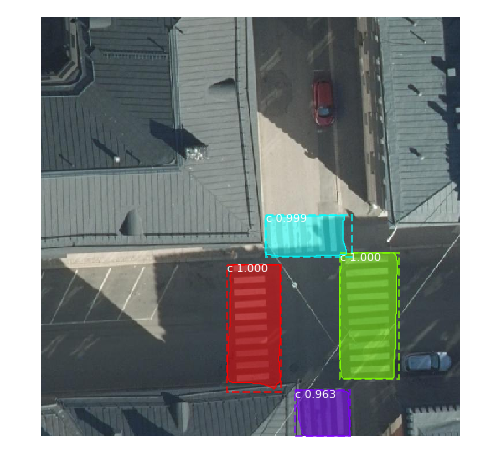

In [16]:
visualize.display_instances(img, r['rois'], r['masks'],r['class_ids'],['BG', 'c', ], r['scores'],figsize=(8,8))